In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize, NonlinearConstraint

from PIL import Image


# String and beam system - NonLinear

Given, the string and beam system from the image below, the objective is to maximize the $X_1$ and $X_2$ loads, knowing that the maximum load for $A$ and $B$ is 300, for $C$ and $D$ is 200, and for $E$ and $F$ is 100, and that the loads can be located anywhere over the beam.

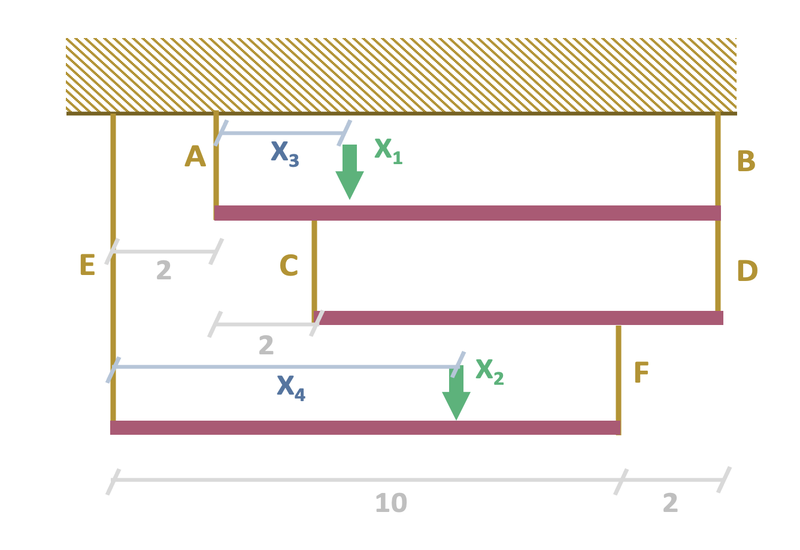

In [2]:
Image.open('./resources/sketch_vigas_nonlinear.png').resize((800, 550), Image.LANCZOS)

**First, we define the equilibrium equations:**

$$t_E + t_F = X_2$$

$$t_C + t_D = t_F$$

$$t_A + t_B = X_1 + t_C + t_D$$

**Then, we obtain the equations for the momentum equilibrium in A, C and E**

$$10 t_F = X_2  X_4$$

$$8 t_D = 6 t_F$$

$$10 t_B = X_3 X_1 + 2 t_C + 10 t_D$$

Assuming that $X_1$ and $X_2$ are positive, we can solve the equations so that:

$$ t_F: {X_2  X_4 \over 10} \leq 100$$

$$ t_E: {X_2 - {X_2 X_4 \over 10}} \leq 100$$

$$ t_D: {3 X_2 X_4 \over 40} \leq 200$$

$$ t_C: {X_2 X_4 \over 40} \leq 200$$

$$ t_B: {X_1 X_3 \over 10} + {2 X_2 X_4 \over 25} \leq 300$$

$$ t_A: X_1 - {X_1 X_3 \over 10} + {X_2 X_4 \over 50} \leq 300$$

$$0 \leq X_3 \leq 10$$

$$0 \leq X_4 \leq 10$$

$$X_1 \geq 0$$

$$X_2 \geq 0$$

As some of these inequalities are more restrictive than others, we can summarize them into:

$$ t_F: {X_2  X_4 \over 10} \leq 100$$

$$ t_E: {X_2 - {X_2 X_4 \over 10}} \leq 100$$

$$ t_D: {3 X_2 X_4 \over 40} \leq 200$$

$$ t_B: {X_1 X_3 \over 10} + {2 X_2 X_4 \over 25} \leq 300$$

$$ t_A: X_1 - {X_1 X_3 \over 10} + {X_2 X_4 \over 50} \leq 300$$

$$0 \leq X_3 \leq 10$$

$$0 \leq X_4 \leq 10$$

$$X_1 \geq 0$$

$$X_2 \geq 0$$

As some of these conditions are more restrictive than others, we can reduce them to:

1) **Define the objective function**

The objective function has to maximize the total load: <br>

$$Z=X_1 + X_2$$


As scipy can only minimize, we will do: <br>

$$-Z=-X_1  -X_2$$


In [3]:
# Define the objective function

def objective(x):
    return -x[0] -x[1]

In [4]:
x0 = [100, 100, 5, 5] #Initial guess of the parameters

2) **Define the constraints**

For nonlinear constraints, the inequalities need to be given as a function

Structure: 

$$x = [X_1, X_2, X_3, X_4]$$

$t_F:$

In [5]:
def constraint_tf(x):
    return x[1] * x[3]

In [6]:
nl_const_tf = NonlinearConstraint(constraint_tf, -np.inf, 1000)

$t_E:$

In [7]:
def constraint_te(x):
    return 10*x[1] - x[1] * x[3]

In [8]:
nl_const_te = NonlinearConstraint(constraint_te, -np.inf, 1000)

$t_D:$

In [9]:
def constraint_td(x):
    return ((3*(x[1] * x[3]))/40)

In [10]:
nl_const_td = NonlinearConstraint(constraint_td, -np.inf, 200)

$t_B:$

In [11]:
def constraint_tb(x):
    return 5*x[0]*x[2] + 4*x[1]*x[3]

In [12]:
nl_const_tb = NonlinearConstraint(constraint_tb, -np.inf, 15000)

$t_A:$

In [13]:
def constraint_ta(x):
    return 50*x[0] - 5*x[0]*x[2] + x[1]*x[3]

In [14]:
nl_const_ta = NonlinearConstraint(constraint_ta, -np.inf, 15000)

3) **Define the bounds**

The loads need to be positive $X_1\geq 0, X_2 \geq 0$ and the maximum $X_3$ and $X_4$ is 10 

In [15]:
bnd = [(0, np.inf), (0, np.inf), (0, 10), (0, 10)]  # Bounds of x1, x2, x3, x4

4) **Optimize**

First, we define all the parameters of the problem

In [16]:
problem = {'fun': objective, #objective function
           'x0': x0, #Initial guess
           'bounds': bnd,
           'constraints': [nl_const_tf,
                           nl_const_te,
                           nl_const_td,
                           nl_const_tb,
                           nl_const_ta,
                          ]
          }

In [17]:
# Choose an optimization method

method = 'SLSQP'

In [18]:
result = minimize(**problem, method=method)
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -699.9999999995696
       x: [ 5.000e+02  2.000e+02  4.400e+00  5.000e+00]
     nit: 10
     jac: [-1.000e+00 -1.000e+00  0.000e+00  0.000e+00]
    nfev: 50
    njev: 10

In [19]:
print('The total load is {0}'.format)

<built-in method format of str object at 0x7fce69be7a80>
